In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [0]:
columns = ['age','workclass','id','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Class']
# Load the Training set (adult_data.data)
train = pd.read_csv('adult_data.data', header=None, names=columns, sep=' *, *')

In [0]:
# Load the Test set (adult_test.txt)
test = pd.read_csv('adult_test.txt', header=None, names=columns, skiprows=1, sep=' *, *')

In [0]:
train.head()

,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
test.head()

,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [0]:
train.describe()

,age,id,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
id                32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
Class             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
print('Train set shape', train.shape)
print('Test set shape', test.shape)

Train set shape (32561, 15)
Test set shape (16281, 15)


In [0]:
print('Train Data in %', (train.shape[0]/(train.shape[0]+test.shape[0])*100))
print('Test Data in %', (test.shape[0]/(train.shape[0]+test.shape[0])*100))

Train Data in % 66.66598419393145
Test Data in % 33.33401580606854


In [0]:
train.Class.value_counts()

<=50K    24720
>50K      7841
Name: Class, dtype: int64

In [0]:
test.Class.value_counts()

<=50K.    12435
>50K.      3846
Name: Class, dtype: int64

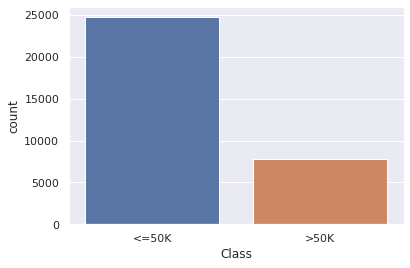

In [0]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=train)

In [0]:
train.age.unique(

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

The maximum age is 90
The minimum age is 17


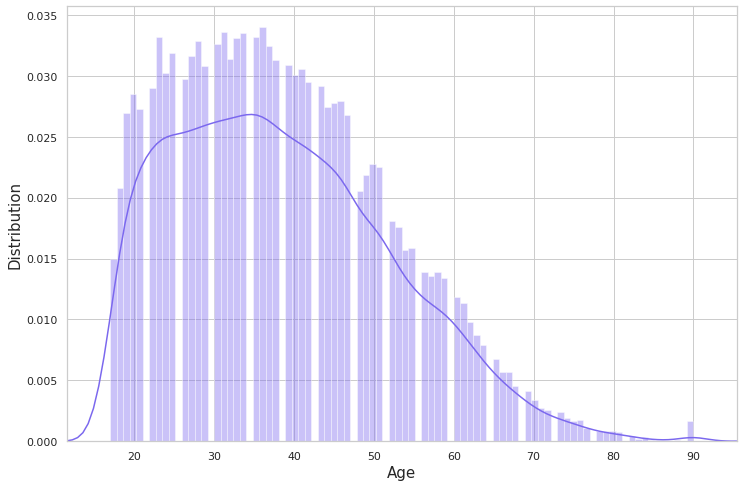

In [0]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
sns.set(style = 'whitegrid')

sns.distplot(train['age'], bins = 90, color = 'mediumslateblue')
plt.ylabel("Distribution", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.margins(x = 0)

print ("The maximum age is", train['age'].max())
print ("The minimum age is", train['age'].min())

In [0]:
train.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [0]:
test.workclass.value_counts()

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

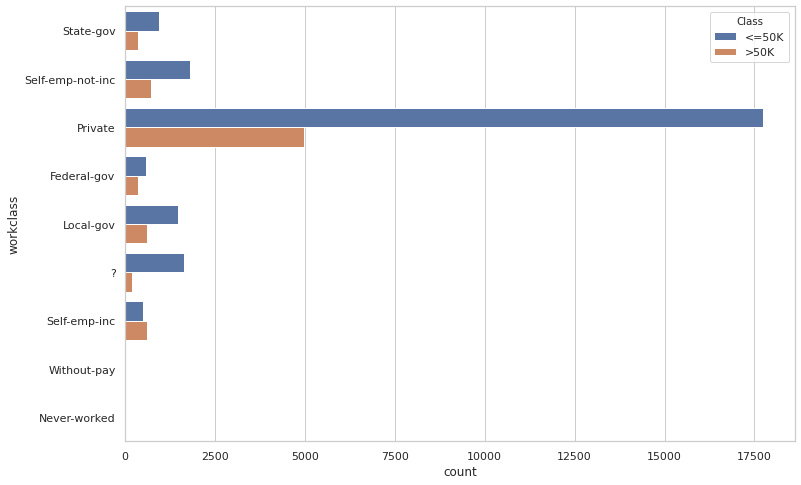

In [0]:
import seaborn as sns

sns.countplot(y='workclass', hue='Class', data = train.select_dtypes(include=['object']))

In [0]:
train.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [0]:
train.education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [0]:
edu = train.groupby(['education','education_num']).size().reset_index()

In [0]:
edu.sort_values(by ='education_num', ascending = True)

,education,education_num,0
13,Preschool,1,51
3,1st-4th,2,168
4,5th-6th,3,333
5,7th-8th,4,646
6,9th,5,514
0,10th,6,933
1,11th,7,1175
2,12th,8,433
11,HS-grad,9,10501
15,Some-college,10,7291


In [0]:
train.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [0]:
train.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

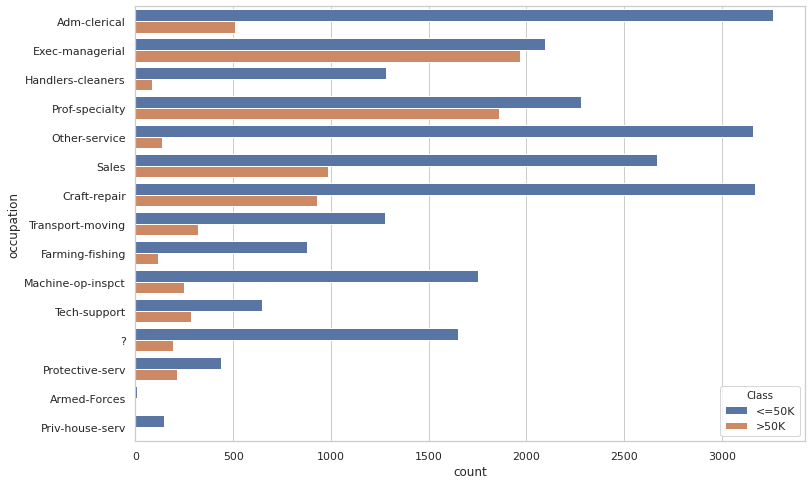

In [0]:
import seaborn as sns

sns.countplot(y='occupation', hue='Class', data = train.select_dtypes(include=['object']))

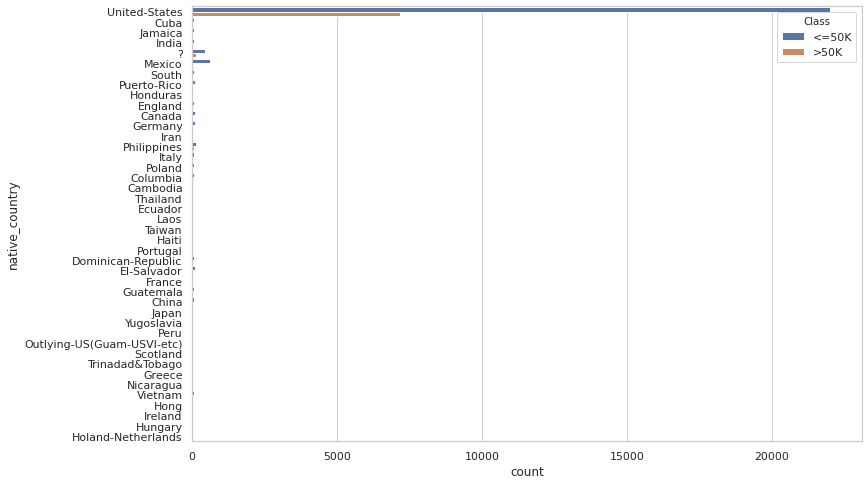

In [0]:
sns.countplot(y='native_country', hue='Class', data = train.select_dtypes(include=['object']))

In [0]:
train.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [0]:
train.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [0]:
train.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [0]:
train.capital_gain.describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

In [0]:
train.capital_loss.describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

In [0]:
train.hours_per_week.describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [0]:
train.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [0]:
train.Class.value_counts()

<=50K    24720
>50K      7841
Name: Class, dtype: int64

In [0]:
test.Class.value_counts()

<=50K.    12435
>50K.      3846
Name: Class, dtype: int64

In [0]:
train.head(10)

,age,workclass,id,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


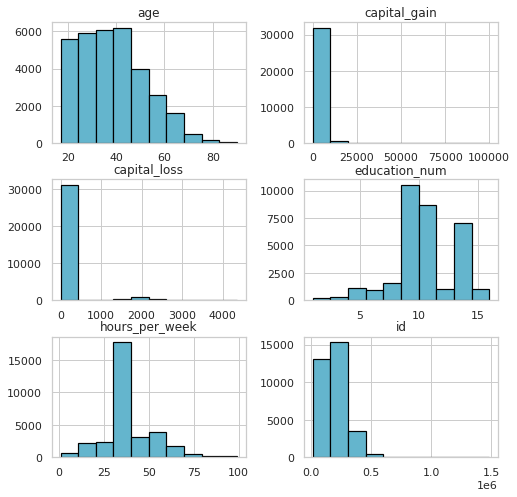

In [0]:
# Distribution of Different Features of the Dataset
distribution = train.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

# Data Preprocessing

In [0]:
train.Class = train.Class.str.replace('<=50K', '0',  regex=False)
train.Class = train.Class.str.replace('>50K', '1', regex=False)
train.Class = train.Class.astype(int)

test.Class = test.Class.str.replace('<=50K.', '0',  regex=False)
test.Class = test.Class.str.replace('>50K.', '1', regex=False)
test.Class = test.Class.astype(int)

## Handling Missing Values

### Method 1: Using Logistic Regression

In [0]:
'''
# Missing value chosen using Classification. (see notebook IncomePredication_MissingValWithModel)
train.workclass = train.workclass.str.replace('?','Private', regex=False)
train.occupation = train.occupation.str.replace('?','Craft-repair', regex=False)
train.native_country = train.native_country.str.replace('?',' United-States', regex=False)

test.workclass = test.workclass.str.replace('?','Private', regex=False)
test.occupation = test.occupation.str.replace('?','Craft-repair', regex=False)
test.native_country = test.native_country.str.replace('?',' United-States', regex=False)
'''

"\n# Missing value chosen using Classification. (see notebook IncomePredication_MissingValWithModel)\ntrain.workclass = train.workclass.str.replace('?','Private', regex=False)\ntrain.occupation = train.occupation.str.replace('?','Craft-repair', regex=False)\ntrain.native_country = train.native_country.str.replace('?',' United-States', regex=False)\n\ntest.workclass = test.workclass.str.replace('?','Private', regex=False)\ntest.occupation = test.occupation.str.replace('?','Craft-repair', regex=False)\ntest.native_country = test.native_country.str.replace('?',' United-States', regex=False)\n"

### Method 2: Dropping null values

In [0]:
# Missing value chosen using Classification. (see notebook IncomePredication_MissingValWithModel)
train.workclass.replace('?',np.nan, inplace=True)
train.occupation.replace('?',np.nan, inplace=True)
train.native_country.replace('?',np.nan, inplace=True)

test.workclass.replace('?',np.nan, inplace=True)
test.occupation.replace('?',np.nan, inplace=True)
test.native_country.replace('?',np.nan, inplace=True)

In [0]:
train = train.dropna()

In [0]:
train.shape

(30162, 15)

In [0]:
test = test.dropna()

## Outlier Detection

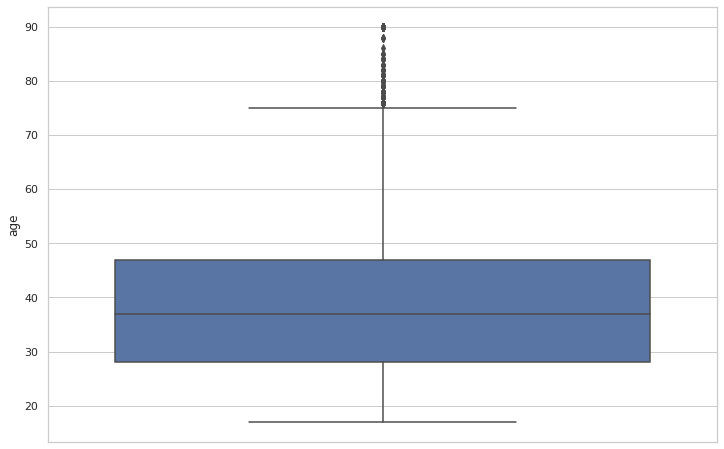

In [0]:
sns.boxplot(data = train, y = 'age')

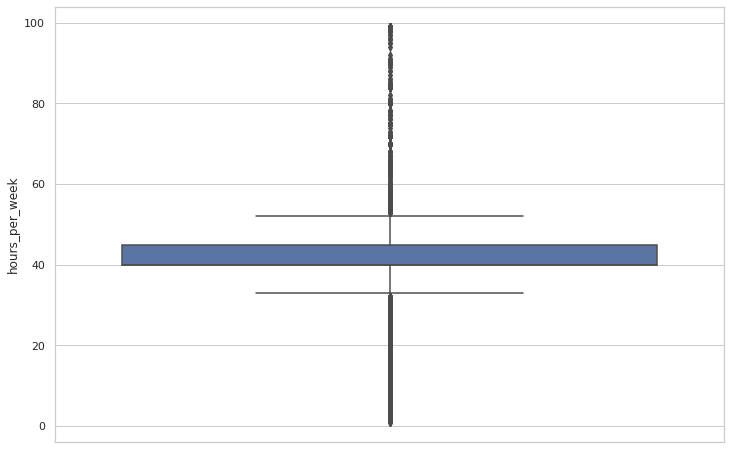

In [0]:
sns.boxplot(data = train, y = 'hours_per_week')

## Feature Selection

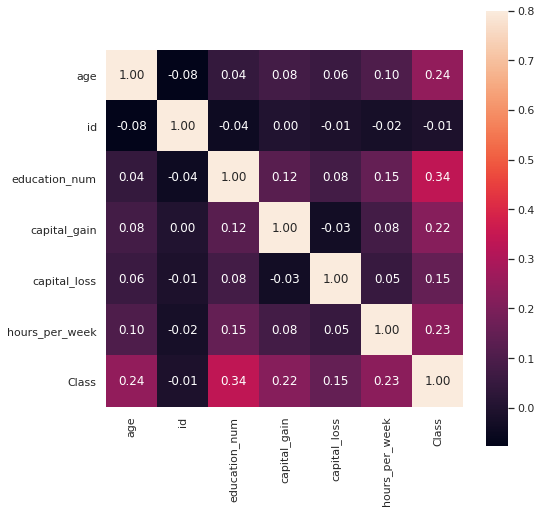

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
# correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(corrmat,annot=True, square=True, fmt='.2f', vmax=.8);

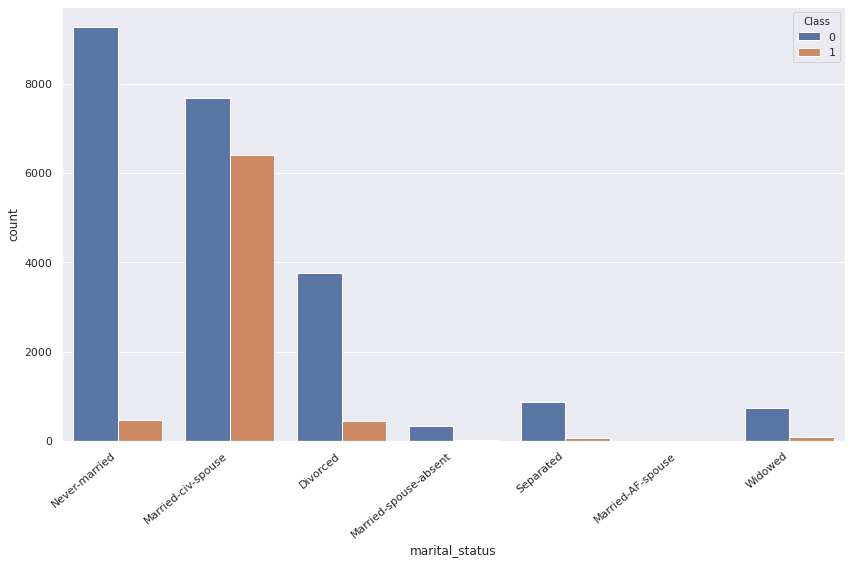

In [0]:
ax = sns.countplot(train['marital_status'], hue=train['Class'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [0]:
test.marital_status.value_counts()

Married-civ-spouse       6990
Never-married            4872
Divorced                 2083
Separated                 472
Widowed                   450
Married-spouse-absent     182
Married-AF-spouse          11
Name: marital_status, dtype: int64

In [0]:
train.marital_status = train.marital_status.str.replace('Widowed','single', regex=False)
train.marital_status = train.marital_status.str.replace('Divorced','single', regex=False)
train.marital_status = train.marital_status.str.replace('Separated','single', regex=False)
train.marital_status = train.marital_status.str.replace('Never-married','single', regex=False)
train.marital_status = train.marital_status.str.replace('Married-spouse-absent','Married', regex=False)
train.marital_status = train.marital_status.str.replace('Married-civ-spouse','Married', regex=False)
train.marital_status = train.marital_status.str.replace('Married-AF-spouse','Married', regex=False)

In [0]:
test.marital_status = test.marital_status.str.replace('Widowed','single', regex=False)
test.marital_status = test.marital_status.str.replace('Divorced','single', regex=False)
test.marital_status = test.marital_status.str.replace('Separated','single', regex=False)
test.marital_status = test.marital_status.str.replace('Never-married','single', regex=False)
test.marital_status = test.marital_status.str.replace('Married-spouse-absent','Married', regex=False)
test.marital_status = test.marital_status.str.replace('Married-civ-spouse','Married', regex=False)
test.marital_status = test.marital_status.str.replace('Married-AF-spouse','Married', regex=False)

##Categorical to Numeric

###One Hot encoding

In [0]:
cat_cols = ['workclass','marital_status','occupation','relationship','race','sex','native_country']
num_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'Class']

#Train Data
final_train = train[cat_cols]
final_train = pd.get_dummies(final_train)
final_train = final_train.join(train[num_cols])

#Train Data
final_test = test[cat_cols]
final_test = pd.get_dummies(final_test)
final_test = final_test.join(test[num_cols])
#adding column 'native_country_Holand-Netherlands' because there is no record with 
#country 'Holand-Netherlands' in test set.
final_test['native_country_Holand-Netherlands'] = 0

In [0]:
print('Train set shape', final_train.shape)
print('Test set shape', final_test.shape)

Train set shape (30162, 83)
Test set shape (15060, 83)


## Normalization

In [0]:
from sklearn.preprocessing import MinMaxScaler

#Train Data
min_max_scaler = MinMaxScaler()
np_scaled_train = min_max_scaler.fit_transform(final_train)
data_norm_train= pd.DataFrame(np_scaled_train, columns = final_train.columns)
#data_norm.head()

In [0]:
#Test Data
min_max_scaler = MinMaxScaler()
np_scaled_test = min_max_scaler.fit_transform(final_test)
data_norm_test = pd.DataFrame(np_scaled_test, columns = final_test.columns)
#data_norm.head()

## Data Sampling

### SMOTE

In [0]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
train_smote, class_smote = sm.fit_sample(data_norm_train.drop('Class',axis=1), data_norm_train['Class'])

In [0]:
print('Train smote shape', train_smote.shape)
print('Train smote class shape', class_smote.shape)

Train smote shape (45308, 82)
Train smote class shape (45308,)


#Utility Methods

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

def getEvaluationMetrics(y_test, y_pred, bool=False):
  
  classifierMetrics = {}
  
  # Accuracy
  accuracy = accuracy_score(y_test,y_pred)
  print('Accuracy :',accuracy)

  classifierMetrics['Accuracy'] = accuracy
  
  # Classification Report
  print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K'], output_dict=bool))
  
  return classifierMetrics

In [0]:
def getConfusionMatrix(y_test, y_pred):
  # Confusion matrix
  mat = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(mat)
  TP = cm.iloc[1,1] # True Positive - Predicted >50K Correctly
  TN = cm.iloc[0,0] # True Negative - Predicted <=50K Incorrectly
  FP = cm.iloc[0,1] # False Positive - Predicted >50K when it didn't rain
  FN = cm.iloc[1,0] # False Negative - Predicted <=50K when it did rain

  print('Sensitivity: {:.2%}'.format(TP/(FN+TP)))
  print('Specificity: {:.2%}'.format(TN/(FP+TN)))
  
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
  plt.title('A confusion matrix showing the frequency of misclassifications by our classifier')
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  plt.show()

In [0]:
def getROCcurve(y_test, y_prob_rain):
  fpr, tpr, thresholds = roc_curve(y_test,y_prob_rain[:,1])

  #ROC Curve
  fig,ax1 = plt.subplots(figsize=(6,4))
  ax1.plot(fpr, tpr,color='orange')
  ax1.legend(['ROC Curve'],loc=1)
  ax1.set_xlim([-0.005, 1.0])
  ax1.set_ylim([0,1])
  ax1.set_ylabel('True Positive Rate (Sensitivity)')
  ax1.set_xlabel('False Positive Rate \n(1 - Specificity)\n FP / (TN + FP)')
  ax1.set_title('ROC Curve for Income Prediction\n')

  plt.show()
  
  rf_auc = roc_auc_score(y_test,y_prob_rain[:,1])
  print('AUC Score:', rf_auc*100)
  return rf_auc*100

#Models

In [0]:
EvaluationMetrics = {}

In [0]:
#Train data
#Xtrain = data_norm_train.drop(columns='Class', axis=1)
#Ytrain = data_norm_train['Class']

Xtrain = train_smote
Ytrain = class_smote

#Test data
Xtest = data_norm_test.drop(columns='Class', axis=1)
Ytest = data_norm_test['Class']

In [0]:
print('Xtrain shape', Xtrain.shape)
print('Ytrain shape', Ytrain.shape)

print('Xtest shape', Xtest.shape)
print('Ytrain shape', Ytest.shape)

Xtrain shape (45308, 82)
Ytrain shape (45308,)
Xtest shape (15060, 82)
Ytrain shape (15060,)


In [0]:
data_norm_train.shape

(30162, 83)

## Logistic Regression

Accuracy : 0.7618857901726428
              precision    recall  f1-score   support

       <=50K       0.77      0.97      0.86     11360
        >50K       0.57      0.12      0.20      3700

    accuracy                           0.76     15060
   macro avg       0.67      0.55      0.53     15060
weighted avg       0.72      0.76      0.70     15060



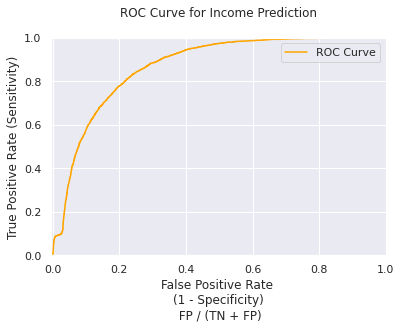

AUC Score: 86.90484868671489
Sensitivity: 12.46%
Specificity: 96.95%


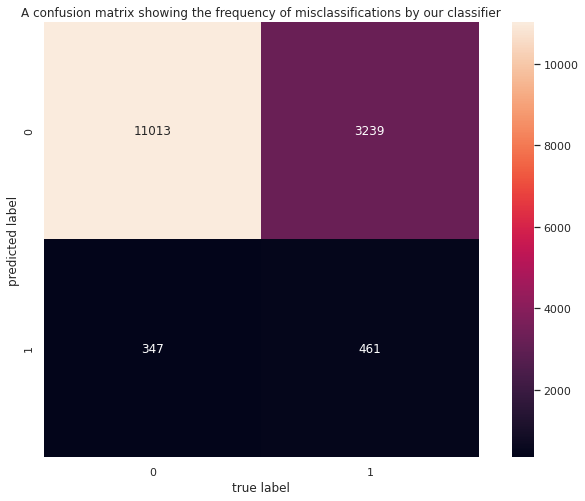

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression(random_state=0)
lr.fit(Xtrain, Ytrain)
Ypred = lr.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
auc = getROCcurve(Ytest, lr.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

metrics['AUC'] = auc

EvaluationMetrics['Logistic Regression'] = metrics

##Decision Tree

Accuracy : 0.7252988047808765
              precision    recall  f1-score   support

       <=50K       0.80      0.85      0.82     11360
        >50K       0.43      0.34      0.37      3700

    accuracy                           0.73     15060
   macro avg       0.61      0.59      0.60     15060
weighted avg       0.71      0.73      0.71     15060



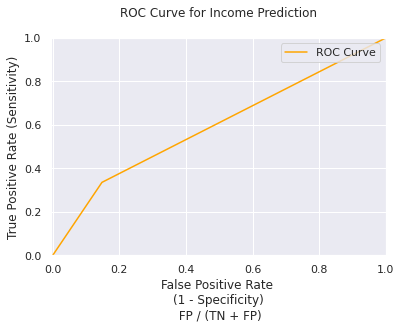

AUC Score: 59.38470688998858
Sensitivity: 33.54%
Specificity: 85.23%


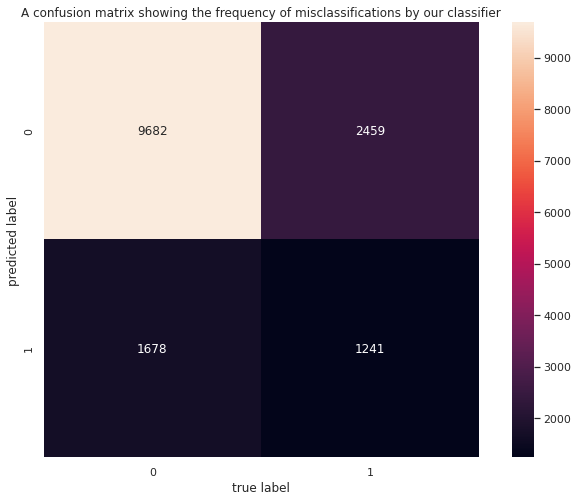

In [0]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(Xtrain, Ytrain)
Ypred = dt.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
auc = getROCcurve(Ytest, dt.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

metrics['AUC'] = auc

EvaluationMetrics['DecisionTreeClassifier'] = metrics

## K-means

### Elbow method

In [0]:
'''
from sklearn.cluster import KMeans

distortions = []
K = range(1,18)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xtrain)
    #print(kmeanModel.inertia_)
    distortions.append(kmeanModel.inertia_)
'''    

'\nfrom sklearn.cluster import KMeans\n\ndistortions = []\nK = range(1,18)\nfor k in K:\n    kmeanModel = KMeans(n_clusters=k)\n    kmeanModel.fit(Xtrain)\n    #print(kmeanModel.inertia_)\n    distortions.append(kmeanModel.inertia_)\n'

In [0]:
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(10,6))\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal k')\nplt.show()\n"

### Model

Accuracy : 0.2889774236387782
              precision    recall  f1-score   support

       <=50K       0.55      0.31      0.40     11360
        >50K       0.10      0.23      0.14      3700

    accuracy                           0.29     15060
   macro avg       0.32      0.27      0.27     15060
weighted avg       0.44      0.29      0.33     15060

Sensitivity: 22.95%
Specificity: 30.84%


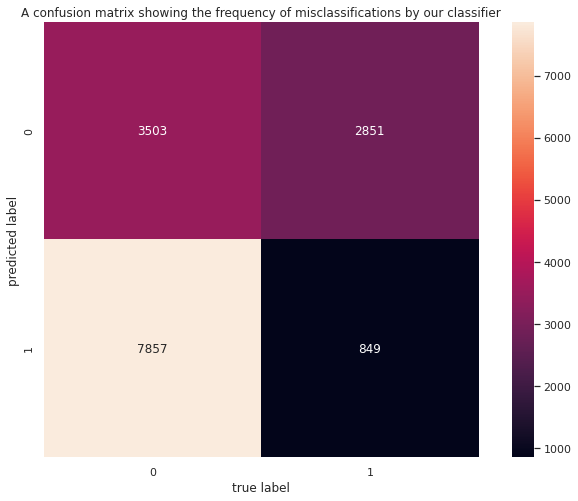

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(Xtrain)
Ypred = kmeans.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
#auc = getROCcurve(Ytest, kmeans.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

#metrics['AUC'] = auc

EvaluationMetrics['Kmeans'] = metrics

In [0]:
'''
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
'''

"\nimport matplotlib.pyplot as plt\n\ncenters = kmeans.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);\n"

## SVM

In [0]:
#from sklearn.svm import SVC

#svm = SVC(C=1.0, kernel='linear', degree=2, gamma='auto')
#svm.fit(Xtrain,Ytrain)

In [0]:
# Predicting the Class on validation dataset
#predictions_SVM = svm.predict(test_smote.drop('Class',axis=1))

# Use accuracy_score function to get the accuracy
#print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_smote['Class'])*100)

## RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

Accuracy : 0.7618193891102257
              precision    recall  f1-score   support

       <=50K       0.77      0.97      0.86     11360
        >50K       0.58      0.11      0.19      3700

    accuracy                           0.76     15060
   macro avg       0.67      0.54      0.52     15060
weighted avg       0.72      0.76      0.70     15060



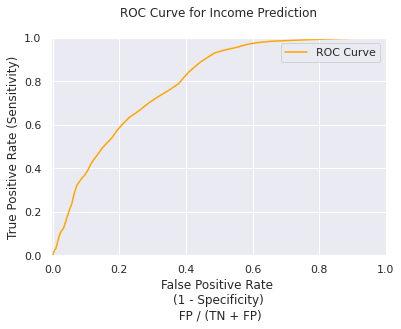

AUC Score: 79.31318757137419
Sensitivity: 11.30%
Specificity: 97.32%


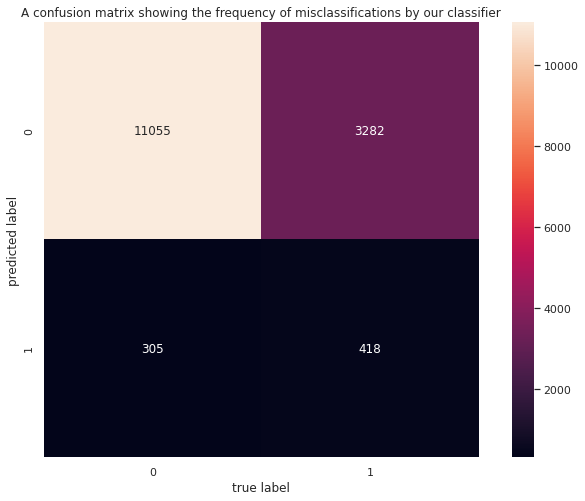

In [0]:
Ypred = clf.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
auc = getROCcurve(Ytest, clf.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

metrics['AUC'] = auc

EvaluationMetrics['RandomForestClassifier'] = metrics

## Bagging

Accuracy : 0.7614873837981407
              precision    recall  f1-score   support

       <=50K       0.76      0.99      0.86     11360
        >50K       0.64      0.07      0.12      3700

    accuracy                           0.76     15060
   macro avg       0.70      0.53      0.49     15060
weighted avg       0.73      0.76      0.68     15060



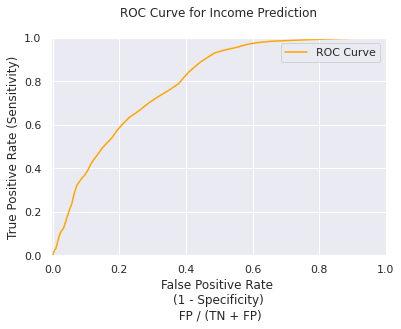

AUC Score: 79.31318757137419
Sensitivity: 6.51%
Specificity: 98.83%


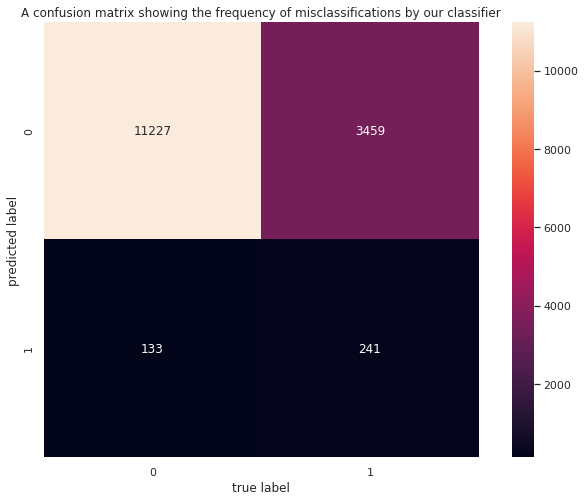

In [0]:
from sklearn.ensemble import BaggingClassifier

clf_bag = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features = 'true',
                            warm_start = 'true', n_estimators=20)
clf_bag.fit(Xtrain,Ytrain)
Ypred = clf_bag.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
auc = getROCcurve(Ytest, clf.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

metrics['AUC'] = auc

EvaluationMetrics['BaggingClassifier'] = metrics


## AdaBoostClassifier

Accuracy : 0.7681938911022577
              precision    recall  f1-score   support

       <=50K       0.79      0.95      0.86     11360
        >50K       0.58      0.21      0.30      3700

    accuracy                           0.77     15060
   macro avg       0.68      0.58      0.58     15060
weighted avg       0.74      0.77      0.72     15060



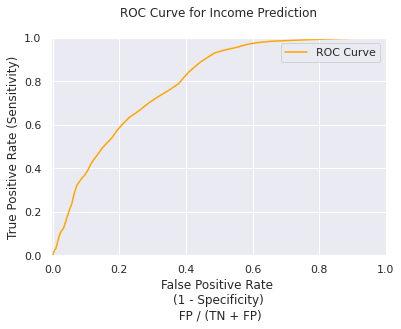

AUC Score: 79.31318757137419
Sensitivity: 20.68%
Specificity: 95.11%


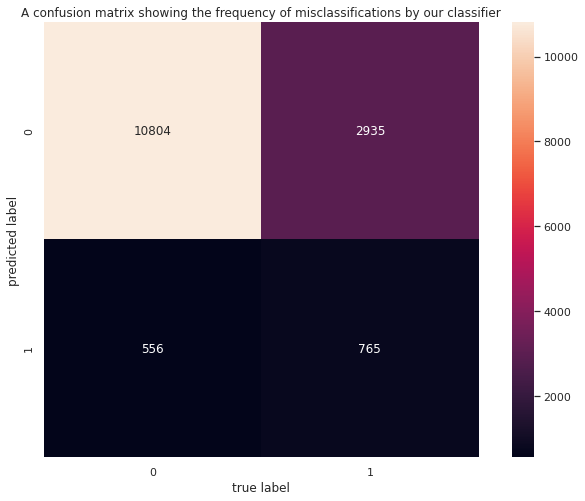

In [0]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(Xtrain,Ytrain)
Ypred = ada.predict(Xtest)

metrics = getEvaluationMetrics(Ytest,Ypred)
# Get the ROC Curve
auc = getROCcurve(Ytest, clf.predict_proba(Xtest))
# Get the Confusion Matrix
getConfusionMatrix(Ytest, Ypred)

metrics['AUC'] = auc

EvaluationMetrics['AdaBoostClassifier'] = metrics

#Model Comparison

In [0]:
evaluationMetrics = pd.DataFrame(EvaluationMetrics)

evaluationMetrics.head(10).transpose()

,Accuracy,AUC
Logistic Regression,0.761886,86.904849
DecisionTreeClassifier,0.725299,59.384707
Kmeans,0.288977,NaN
RandomForestClassifier,0.761819,79.313188
BaggingClassifier,0.761487,79.313188
AdaBoostClassifier,0.768194,79.313188


LR: 0.803611 (0.008713)
DT: 0.853097 (0.041532)
RandomForest: 0.883643 (0.040499)
Bagging: 0.891943 (0.051585)
AdaBoost: 0.842700 (0.027002)


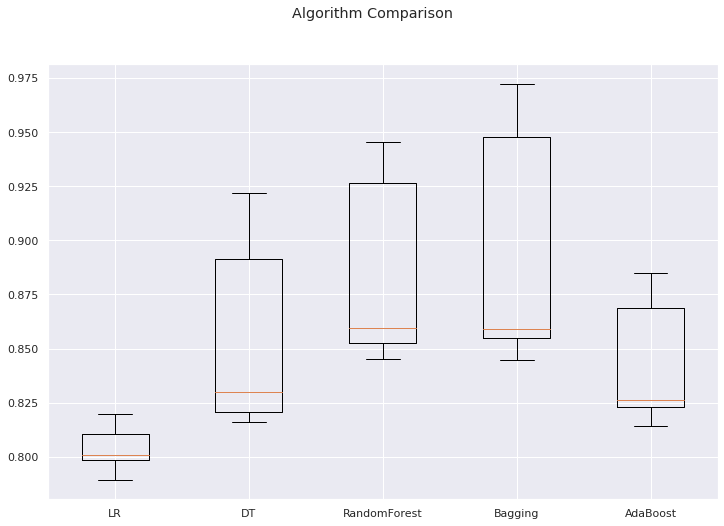

In [0]:
from sklearn import model_selection

seed =7
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('DT', DecisionTreeClassifier(random_state=0)))
#models.append(('KMeans', KMeans(n_clusters=2)))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100, random_state=24)))
models.append(('Bagging', BaggingClassifier(DecisionTreeClassifier(), bootstrap_features = 'true',
                            warm_start = 'true', n_estimators=20)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()